<b>Design and develop an Artificial Neural Network model using
below conditions for diabetes prediction.      
1Perform EDA        
2)Train and evaluate the performance of model using appropriate metrics.<br>
3)Display run time chart   
4)Apply regularization technique like L1, L2, dropout and early stopping to improve the performance of the model.       
5)Experiment with individual or combination of regularization techniques.      
6)Provide comparative analysis       
7)Save the ANN model.

<b>1. Import Libraries and Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

In [ ]:
data = pd.read_csv('diabetes.csv')

<b>2. Exploratory Data Analysis (EDA)

In [ ]:
# Display basic statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

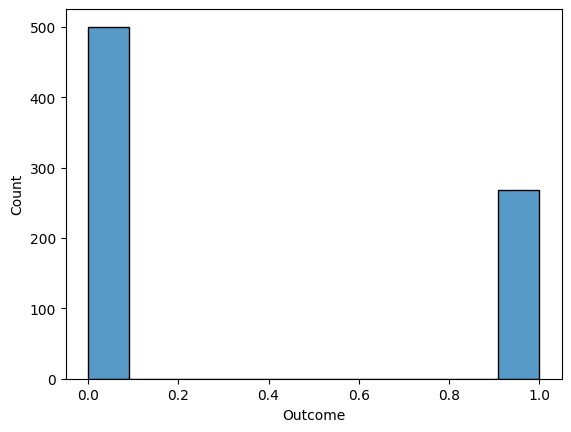

In [ ]:
# Visualize data distribution
sns.histplot(data['Outcome'])
plt.show()

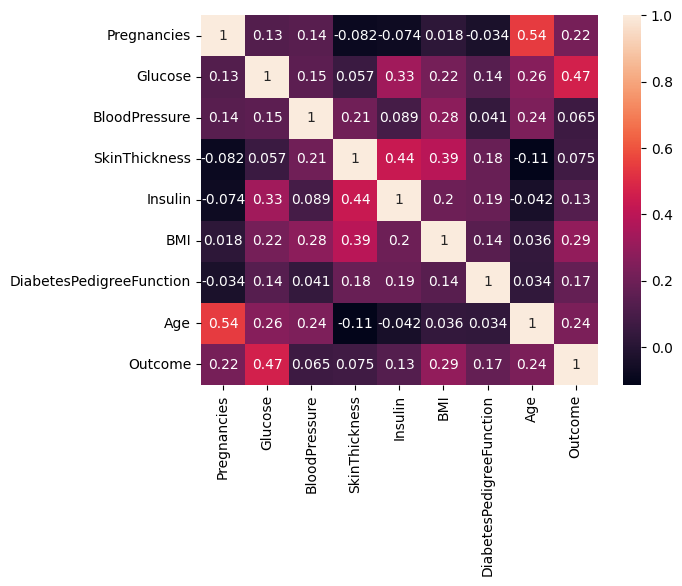

In [ ]:
# Explore correlations
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

<b>3. Data Preprocessing

In [ ]:
# Separate features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<b>4. Build the ANN Model

In [ ]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<b>5. Train and Evaluate

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6404 - loss: 0.6499 - val_accuracy: 0.7013 - val_loss: 0.6176
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6980 - loss: 0.6063 - val_accuracy: 0.7143 - val_loss: 0.5941
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7279 - loss: 0.5687 - val_accuracy: 0.7143 - val_loss: 0.5727
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7367 - loss: 0.5485 - val_accuracy: 0.7143 - val_loss: 0.5579
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7307 - loss: 0.5333 - val_accuracy: 0.7468 - val_loss: 0.5444
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7401 - loss: 0.5140 - val_accuracy: 0.7468 - val_loss: 0.5351
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7124 - loss: 0.5348 - val_accuracy: 0.7468 - val_loss: 0.5250
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7841 - loss: 0.4737 - val_accuracy: 0.733

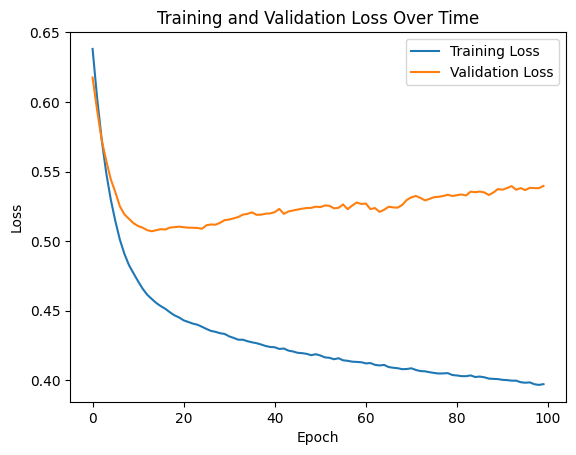

Training time:  22.08529019355774


In [ ]:
start_time = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
end_time = time.time()

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Display run time chart
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.show()
print("Training time: ", end_time - start_time)

<b>6. Regularization

a) L1/L2 Regularization

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5970 - loss: 0.8806 - val_accuracy: 0.6753 - val_loss: 0.8420
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6212 - loss: 0.8438 - val_accuracy: 0.7143 - val_loss: 0.8118
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6649 - loss: 0.7955 - val_accuracy: 0.7273 - val_loss: 0.7873
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6996 - loss: 0.7843 - val_accuracy: 0.7338 - val_loss: 0.7675
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.7590 - val_accuracy: 0.7273 - val_loss: 0.7515
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7382 - loss: 0.7306 - val_accuracy: 0.7078 - val_loss: 0.7356
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7498 - loss: 0.7118 - val_accuracy: 0.7078 - val_loss: 0.7219
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7719 - loss: 0.6848 - val_accuracy: 0.7273 - val_loss: 0

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Accuracy with L2: 0.7662337662337663
Precision with L2: 0.6727272727272727
Recall with L2: 0.6727272727272727
F1-score with L2: 0.6727272727272727
Training time:  22.712425231933594


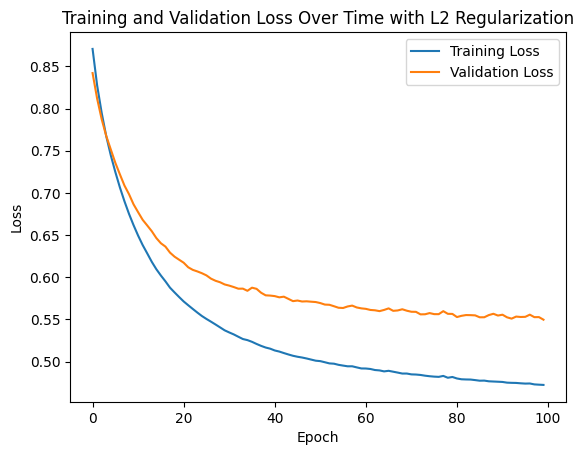

In [ ]:
model_l2 = Sequential()
model_l2.add(Dense(12, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))
model_l2.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
model_l2.add(Dense(1, activation='sigmoid'))
model_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train and evaluate the model with L2 regularization
start_time = time.time()  # Record start time

history_l2 = model_l2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

end_time = time.time()  # Record end time

# Evaluate the model with L2 regularization
y_pred_l2 = model_l2.predict(X_test)
y_pred_l2 = (y_pred_l2 > 0.5)  # Convert probabilities to binary predictions

accuracy_l2 = accuracy_score(y_test, y_pred_l2)
precision_l2 = precision_score(y_test, y_pred_l2)
recall_l2 = recall_score(y_test, y_pred_l2)
f1_l2 = f1_score(y_test, y_pred_l2)

print(f"Accuracy with L2: {accuracy_l2}")
print(f"Precision with L2: {precision_l2}")
print(f"Recall with L2: {recall_l2}")
print(f"F1-score with L2: {f1_l2}")
print("Training time: ", end_time - start_time)  # Print training time

# Display run time chart for L2 Regularization model
plt.plot(history_l2.history['loss'], label='Training Loss')
plt.plot(history_l2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time with L2 Regularization')
plt.legend()
plt.show()

<b>b) Dropout:

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6531 - loss: 0.8341 - val_accuracy: 0.7273 - val_loss: 0.8518
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7054 - loss: 0.7553 - val_accuracy: 0.7468 - val_loss: 0.8161
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6832 - loss: 0.7543 - val_accuracy: 0.7597 - val_loss: 0.7838
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7262 - loss: 0.7121 - val_accuracy: 0.7468 - val_loss: 0.7589
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7303 - loss: 0.7083 - val_accuracy: 0.7208 - val_loss: 0.7368
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7442 - loss: 0.6778 - val_accuracy: 0.7338 - val_loss: 0.7181
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7266 - loss: 0.6571 - val_accuracy: 0.7468 - val_loss: 0.7019
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7336 - loss: 0.6641 - val_accuracy: 0.7792 - val_loss: 0.

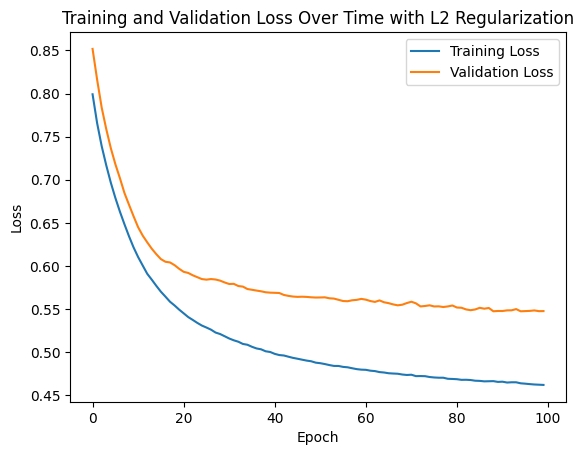

In [ ]:
model_dropout = Sequential()
model_dropout.add(Dense(12, activation='relu', input_dim=X_train.shape[1]))
model_dropout.add(Dropout(0.2))  # Add dropout layer
model_dropout.add(Dense(8, activation='relu'))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(1, activation='sigmoid'))
model_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train and evaluate the model with dropout
start_time = time.time()
history_l2 = model_l2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
end_time = time.time()


# Evaluate the model with L2 regularization
y_pred_l2 = model_l2.predict(X_test)
y_pred_l2 = (y_pred_l2 > 0.5)  # Convert probabilities to binary predictions

accuracy_l2 = accuracy_score(y_test, y_pred_l2)
precision_l2 = precision_score(y_test, y_pred_l2)
recall_l2 = recall_score(y_test, y_pred_l2)
f1_l2 = f1_score(y_test, y_pred_l2)

print(f"Accuracy with L2: {accuracy_l2}")
print(f"Precision with L2: {precision_l2}")
print(f"Recall with L2: {recall_l2}")
print(f"F1-score with L2: {f1_l2}")
print("Training time: ", end_time - start_time)

# Display run time chart for L2 Regularization model
plt.plot(history_l2.history['loss'], label='Training Loss')
plt.plot(history_l2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time with L2 Regularization')
plt.legend()
plt.show()

<b>c) Early Stopping:

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model with early stopping
history_early_stopping = model.fit(X_train, y_train, epochs=100, batch_size=32,
                                   validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8082 - loss: 0.4058 - val_accuracy: 0.7468 - val_loss: 0.5384
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8345 - loss: 0.3601 - val_accuracy: 0.7468 - val_loss: 0.5372
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8343 - loss: 0.3606 - val_accuracy: 0.7403 - val_loss: 0.5399
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8161 - loss: 0.3825 - val_accuracy: 0.7338 - val_loss: 0.5418
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8127 - loss: 0.3790 - val_accuracy: 0.7468 - val_loss: 0.5411
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8256 - loss: 0.3917 - val_accuracy: 0.7403 - val_loss: 0.5400
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8225 - loss: 0.3746 - val_accuracy: 0.7338 - val_loss: 0.5403
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8150 - loss: 0.3904 - val_accuracy: 0.7468 

<b>7. Comparative Analysis

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1

# Define and train model_l1 with L1 regularization
model_l1 = Sequential([
    Dense(12, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l1(0.01)),
    Dense(8, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(1, activation='sigmoid')
])
model_l1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_l1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Predictions and metrics calculation
y_pred_l1 = (model_l1.predict(X_test) > 0.5).astype(int)
y_pred_baseline = (model.predict(X_test) > 0.5).astype(int)

metrics = {
    "Baseline": {m: f(y_test, y_pred_baseline) for m, f in zip(['accuracy', 'precision', 'recall', 'f1'],
                                                              [accuracy_score, precision_score, recall_score, f1_score])},
    "L1": {m: f(y_test, y_pred_l1) for m, f in zip(['accuracy', 'precision', 'recall', 'f1'],
                                                     [accuracy_score, precision_score, recall_score, f1_score])}
}

# Display results
print(pd.DataFrame.from_dict(metrics, orient='index'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
          accuracy  precision    recall        f1
Baseline  0.746753   0.642857  0.654545  0.648649
L1        0.772727   0.700000  0.636364  0.666667


<b>8. Save the Model

In [ ]:
model.save('diabetes_model.h5')  # Save the best performing model